In [2]:
import sys
sys.path.insert(0,"..")
import h5py
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import random as rd
from src.utils import *
import seaborn as sns
import matplotlib.cm as cm

/home/abigeard/.cache/pypoetry/virtualenvs/deepgenerativemodelsccs-wseG1uU7-py3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [35]:
# filename = "/home/abigeard/RA_CCS/DeepGenerativeModelsCCS/data/observations64.hdf5"
filename = "/home/abigeard/RA_CCS/DeepGenerativeModelsCCS/data/ore_maps_32.hdf5"
with h5py.File(filename, "r") as f:
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]

    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key])) 

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data = list(f[a_group_key])

    # If a_group_key is a dataset name, 
    # this gets the dataset values and returns as a list
    # preferred methods to get dataset values:
    ds_obj = f[a_group_key]      # returns as a h5py dataset object
    ds_arr = f[a_group_key][()]  # returns as a numpy array
# filename = "/home/abigeard/RA_CCS/DeepGenerativeModelsCCS/data/observations64.hdf5"
filename = "/home/abigeard/RA_CCS/DeepGenerativeModelsCCS/data/ore_maps_observations_32.hdf5"
with h5py.File(filename, "r") as f:
    print("Keys: %s" % f.keys())
    # get first object name/key; may or may NOT be a group
    a_group_key = list(f.keys())[0]

    # get the object type for a_group_key: usually group or dataset
    print(type(f[a_group_key])) 

    # If a_group_key is a group name, 
    # this gets the object names in the group and returns as a list
    data2 = list(f[a_group_key])

    # If a_group_key is a dataset name, 
    # this gets the dataset values and returns as a list
    # preferred methods to get dataset values:
    ds_obj = f[a_group_key]      # returns as a h5py dataset object
    ds_arr = f[a_group_key][()]  # returns as a numpy array

Keys: <KeysViewHDF5 ['X']>
<class 'h5py._hl.dataset.Dataset'>
Keys: <KeysViewHDF5 ['y']>
<class 'h5py._hl.dataset.Dataset'>


torch.Size([1, 2, 32, 32])


/tmp/ipykernel_1421338/2235412515.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


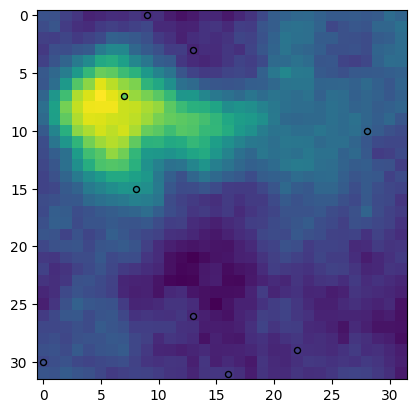

In [38]:
i=10
s = data[i]
y = data2[i]
s=torch.Tensor(s)
y = torch.Tensor(y).unsqueeze(0)
print(y.shape)
y_1_idxs=get_idx_val_2D(y)
cmap = cm.viridis
fig, ax=plt.subplots()
plt.imshow(s.squeeze().detach().cpu(), cmap=cmap)
# sns.heatmap(y[0,1].squeeze().detach().cpu())
# fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# X, Y = np.arange(0, 64, 1), np.arange(0, 64, 1)
# X, Y = np.meshgrid(X, Y)
# ax.plot_surface(X, Y, s.squeeze().detach().cpu())
for j in range(len(y_1_idxs[0][0])):
    observation_pt = (y_1_idxs[0][0][j].cpu(), y_1_idxs[1][0][j].cpu())
    plt.scatter(
        [observation_pt[0][1]],
        [observation_pt[0][0]],
        color=cmap(observation_pt[1]),
        marker='.',
        cmap=cmap,
        s=75,
        edgecolors='black',
    )
# for j in range(len(y_1_idxs[0][0])):
#     observation_pt = (y_1_idxs[0][0][j].cpu(), y_1_idxs[1][0][j].cpu())
#     ax.scatter(
#         [observation_pt[0][0]],
#         [observation_pt[0][1]],
#         [observation_pt[1]],
#         s=25,
#         c="r",
#     )

In [26]:
data2[0].shape

(1, 32, 32)

In [31]:
observations = []
surfaces = []
for s in data:
    n_pts = rd.randint(20,30)
    s = torch.Tensor(s).squeeze()
    # s = F.interpolate(torch.Tensor(s).unsqueeze(0), scale_factor=(32/50,32/50), mode="bilinear").squeeze()
    new_obs = np.zeros((2, s.shape[0], s.shape[1]))
    obs = random_observation_ore_maps(s.unsqueeze(0).unsqueeze(0)).squeeze()
    observations.append(np.array(obs))
    surfaces.append(np.array(s.unsqueeze(0)))

In [33]:
np.stack(observations).shape

(100000, 2, 32, 32)

In [34]:
with h5py.File("/home/abigeard/RA_CCS/DeepGenerativeModelsCCS/data/ore_maps_observations_32.hdf5", "w") as f:
    dset = f.create_dataset("y", data=np.stack(observations))
with h5py.File("/home/abigeard/RA_CCS/DeepGenerativeModelsCCS/data/ore_maps_32.hdf5", "w") as f:
    dset = f.create_dataset("X", data=np.stack(surfaces))

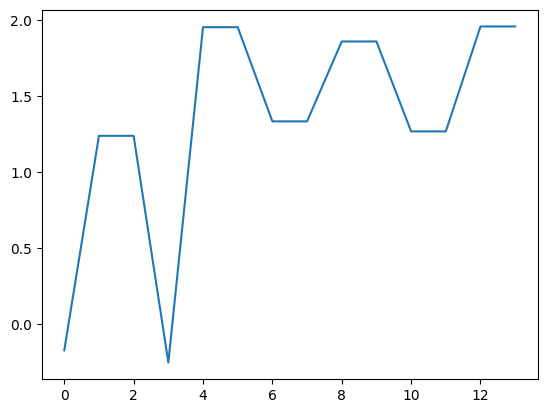

In [40]:
test = data2[1].reshape(10,2,64)
test = torch.Tensor(test)
nonzero = torch.where(test>0)
# nonzero = nonzero[0].unique(),nonzero[1].unique(),nonzero[2].unique()
points = test[nonzero[0], :, nonzero[2]][:,1]
plt.plot(points)

In [11]:
trans = nn.Transformer(d_model=64)
lstm = nn.LSTM(input_size = 64, hidden_size=128)

In [12]:
a = torch.Tensor(data2[0][:13])
b = torch.Tensor(data2[0][18:20])
# trans(a, b).shape
lstm(a)[0].shape

torch.Size([13, 128])